In [10]:
import pandas as pd
import matplotlib as mpl

# settings for pandas ipython output
pd.set_option("display.max_columns", 40)
# settings for figures
COLOR = "black"
FACECOLOR = "white"
mpl.rcParams["text.color"] = COLOR
mpl.rcParams["axes.labelcolor"] = COLOR
mpl.rcParams["xtick.color"] = COLOR
mpl.rcParams["ytick.color"] = COLOR
mpl.rcParams["savefig.facecolor"] = FACECOLOR
mpl.rcParams["axes.facecolor"] = FACECOLOR

### Simulate Experimental Data

In [11]:
from clustering.input_data.simulated_experiment_class import SimulatedExperiment

n_experiments = 10        # number of datasets generated
exp_params = {            # specify parameters different from the default values
    "store_data": False,
    "path_to_store_data": None,
    "min_datapoints": 5,
    "cluster_number_range": (4, 6),
    "cluster": {
        "cluster_size_range": (1, 100),
        "exp_scale_range": (0.001, 1),
        "norm_loc_range": (0.5, 7),
        "norm_scale_range": (0.1, 1),
    },
}
experiment_data = [SimulatedExperiment(str(dataset_id), **exp_params) for dataset_id in range(n_experiments)]

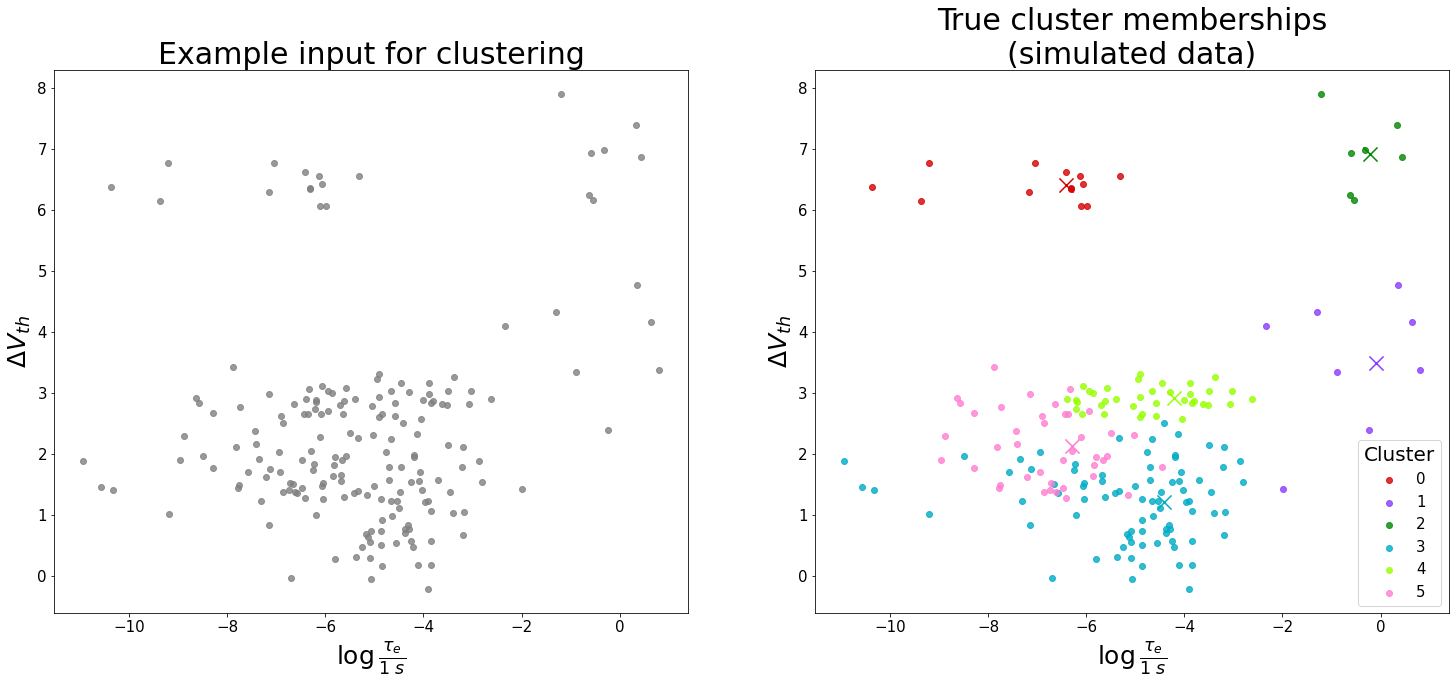

In [12]:
from plotting.plot_funcs import plot_cluster_data_readme
dataset = 0
fig_cluster = plot_cluster_data_readme(experiment_data[dataset].df)
fig_cluster

### Run Clustering

In [13]:
from clustering.clustering import EMClustering

emc_params = {   # specify parameters different from the default values
    "save_data": False,
    "path_to_save": None,
    "parallel": {"n_jobs": 10, "verbose": 11},
    "cluster_init": {
        "init_routine": "random_inside",
        "routine": {
            "N_cluster_min": 1,
            "N_cluster_max": 7,
            "N_runs_per_clusternumber": 30,
            "N_max": 10000,
            "y_scale_range": (0.1, 2),
        },
    },
    "em": {
        "max_reiterations": 500,
        "em_algorithm": {
            "em_tol": 1e-03,
            "max_iter": 500,
            "min_mix_coef": 0.02,
            "abs_tol_params": 1e-08,
            "minimizer_options": {"maxiter": 100},
        },
    },
}
emc = EMClustering(**emc_params)
emc.load_experiments(experiment_data)
emc.run()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:  2.5min remaining:  9.9min
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:  3.2min remaining:  7.6min
[Parallel(n_jobs=10)]: Done   4 out of  10 | elapsed:  3.5min remaining:  5.3min
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:  3.6min remaining:  3.6min
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:  4.4min remaining:  2.9min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  6.2min remaining:  2.6min
[Parallel(n_jobs=10)]: Done   8 out of  10 | elapsed:  6.5min remaining:  1.6min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 11.6min remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 11.6min finished


### Inspect results

In [17]:
df_scores = emc.get_scoreboard()
criterion = "Total_rank_score"
df_select = df_scores.loc[(df_scores.dataset == str(dataset)), :].sort_values(criterion)
df_select.head(5)

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,N_cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank
110,110,7,0.452308,0.463010,11,110,4,0,4,291.988684,-275.988684,-250.097149,-268.652763,0.513229,249.411566,0.785624,2,2,2,2,18,19,45,45,1
62,62,7,0.322879,0.329589,9,62,2,0,3,293.336831,-281.336831,-261.918180,-275.691970,0.699695,182.617888,0.809697,1,1,1,1,3,39,17,46,2
73,73,17,0.551925,0.553817,18,73,1,0,3,249.854763,-237.854763,-218.436111,-231.409523,0.707743,188.513296,0.808769,7,6,6,6,2,36,18,63,3
68,68,27,0.799394,0.804357,29,68,2,0,3,244.889792,-232.889792,-213.471140,-227.556172,0.697774,266.317382,0.810980,12,12,11,11,5,16,1,67,4
84,84,30,1.310012,1.311711,31,84,1,0,3,248.565632,-236.565632,-217.146980,-229.985961,0.707743,188.513296,0.808696,8,7,7,7,2,36,19,67,4


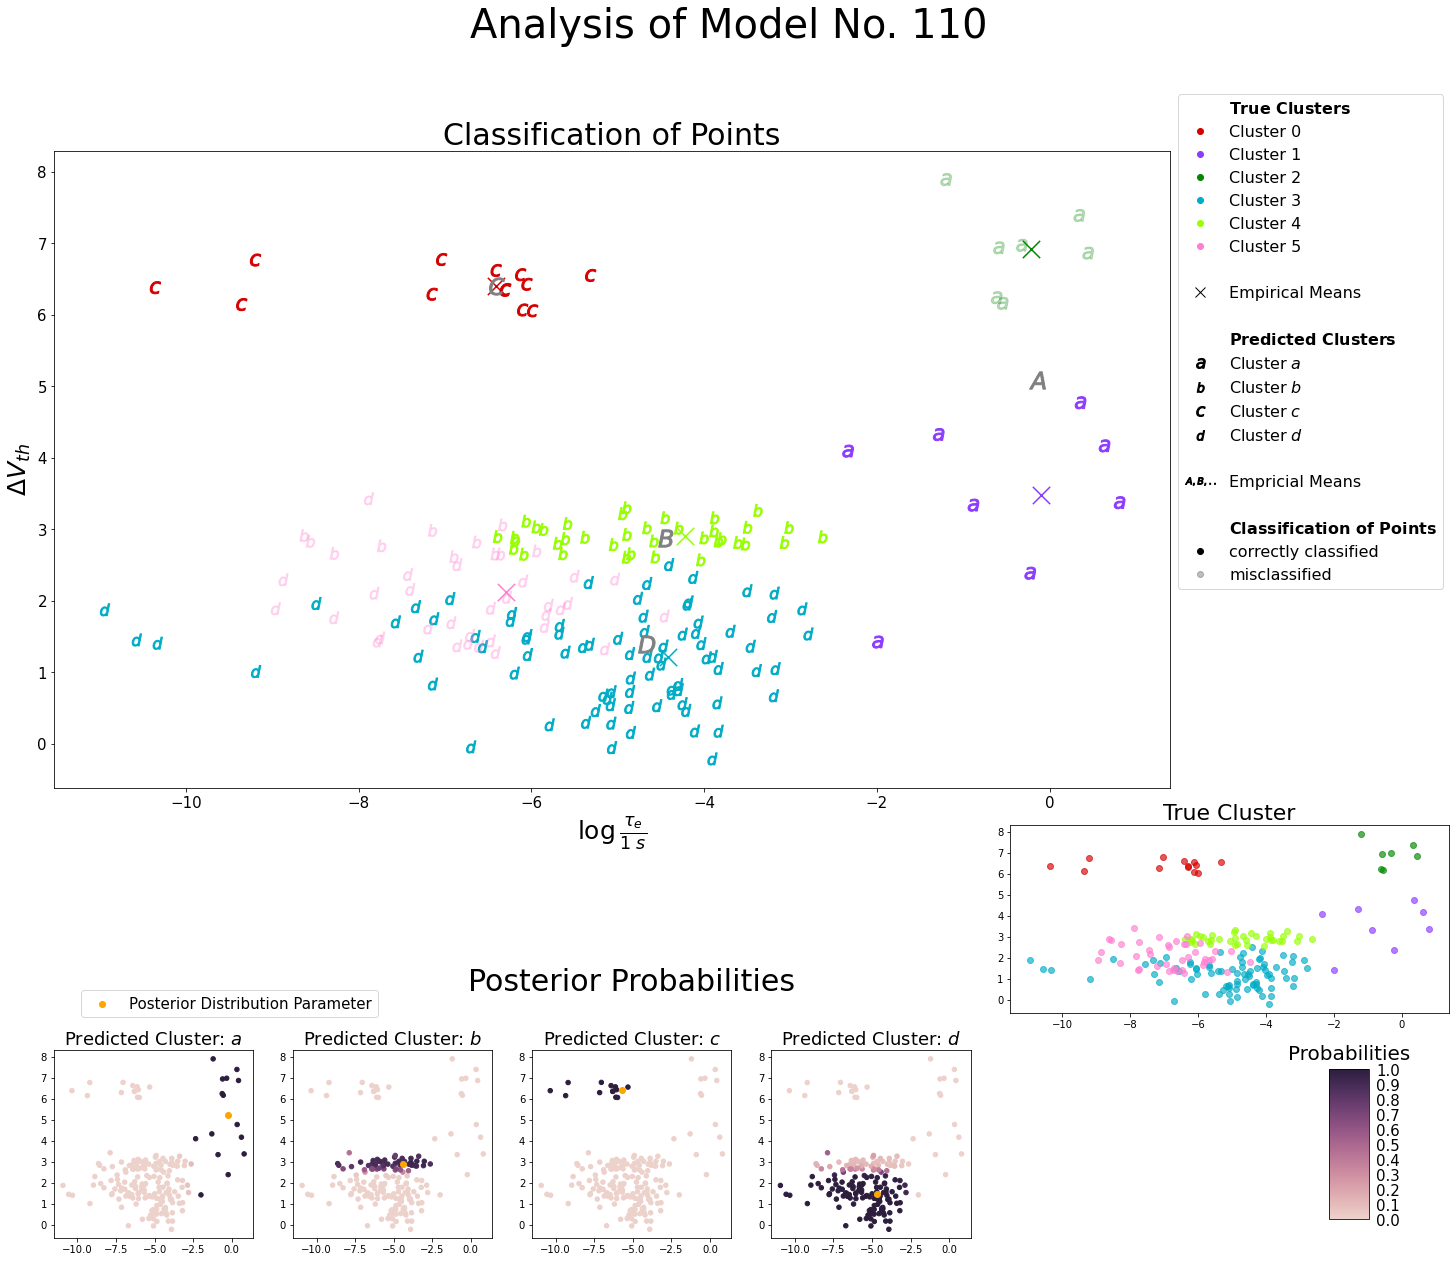

In [15]:
from plotting.clustering_assessment.plot import plot_clustering_assessment

model_idx = df_select.iloc[0, 0]  # best model for specific dataset according to scoreboard
fig = plot_clustering_assessment(emc.model_data, df_scores, model_idx)
fig